# Webscraping + cleaning

Used: https://en.wikipedia.org/wiki/List_of_Formula_One_World_Constructors%27_Champions

In [59]:
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Make a request
page = requests.get(
    "https://en.wikipedia.org/wiki/List_of_Formula_One_World_Constructors%27_Champions")
soup = bs(page.content, 'html.parser')

# Find 'World Constructors' Champions by season' table
tables = soup.find_all("table")
constructors_wiki_table = tables[2]

# Find all <tr> in the table
list_of_tr = constructors_wiki_table.find_all("tr")

# Find all <td> (columns) 
arr_rows = []
for tr in list_of_tr:
    td = tr.find_all("td")
    
    if len(td) > 0:
        temp_arr = []

        for val in td:
            val = val.get_text()
            val = val.translate(str.maketrans('','',"†\n*")) #sign deleting
            temp_arr.append(val)
            
        arr_rows.append(temp_arr)


# All rows from column in array of arrays
print("[Season, Chassis, Engine, Tyre, Drivers, Poles, Wins, Podiums, Fastest laps, Points, % Points, Clinched, Margin points, Margin %] \n")
for i in arr_rows:
    print(i)

[Season, Chassis, Engine, Tyre, Drivers, Poles, Wins, Podiums, Fastest laps, Points, % Points, Clinched, Margin points, Margin %] 

['1958', 'Vanwall', 'Vanwall', 'D', 'Stirling MossTony Brooks', '5', '6', '9', '3', '48', '100.00 (71.25)', 'Race 10 of 11', '8', '16.66']
['1959', 'Cooper', 'Climax', 'D', 'Jack BrabhamStirling MossBruce McLaren', '5', '5', '13', '5', '40', '100.00 (82.81)', 'Race 8 of 9', '8', '20.00']
['1960', 'Cooper', 'Climax', 'D', 'Jack BrabhamBruce McLaren', '4', '6', '14', '5', '48', '100.00 (80.56)', 'Race 7 of 10', '14', '29.17']
['1961', 'Ferrari', 'Ferrari', 'D', 'Phil HillWolfgang von Trips', '6', '5', '14', '5', '45', '100.00 (81.25)', 'Race 5 of 8', '10', '22.22']
['1962', 'BRM', 'BRM', 'D', 'Graham Hill', '1', '4', '8', '3', '42', '93.33 (69.14)', 'Race 9 of 9', '6', '14.29']
['1963', 'Lotus', 'Climax', 'D', 'Jim Clark', '7', '7', '9', '6', '54', '100.00 (82.22)', 'Race 7 of 10', '18', '33.33']
['1964', 'Ferrari', 'Ferrari', 'D', 'John SurteesLorenzo Bandi

## Example use -> count constructor championships

### Preparing values needed

In [83]:
# Dictionary
dict_contructors = {}

# Loop through arr of vals
for i in arr_rows:
    if i[1] not in dict_contructors.keys():
        dict_contructors[i[1]] = 1
    else:
        dict_contructors[i[1]] += 1

dict_contructors = dict(sorted(dict_contructors.items(), key=lambda item: item[1]))
print(dict_contructors)

{'Vanwall': 1, 'BRM': 1, 'Matra': 1, 'Tyrrell': 1, 'Benetton': 1, 'Brawn': 1, 'Cooper': 2, 'Brabham': 2, 'Renault': 2, 'Red Bull': 6, 'Lotus': 7, 'McLaren': 8, 'Mercedes': 8, 'Williams': 9, 'Ferrari': 16}


### Forming chart

Text(0.5, 1.0, 'Costructor Championships 1958 - 2023')

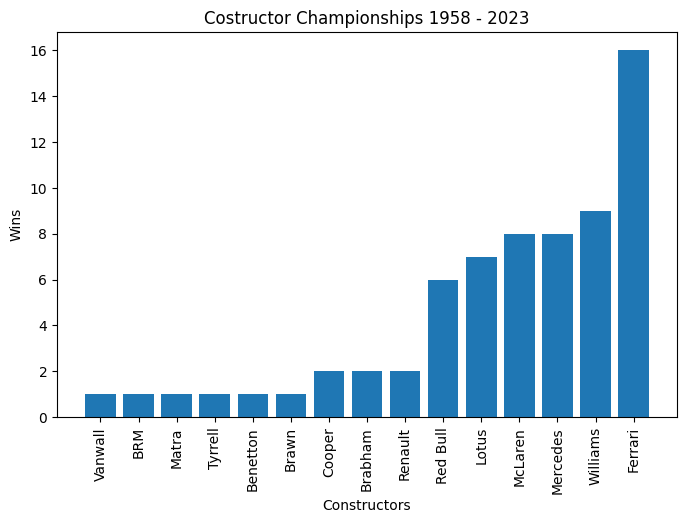

In [91]:
fig,ax=plt.subplots(figsize=(8,5))
ax.bar(dict_contructors.keys(), dict_contructors.values())
ax.set_xlabel("Constructors")
plt.xticks(rotation=90)
ax.set_ylabel("Wins")
ax.set_title("Costructor Championships 1958 - 2023")